In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

from utils.utils import XyScaler
%matplotlib inline

/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('merged_data.csv')
data = data.dropna()
data.head()

,Unnamed: 0,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [3]:
pd.set_option("display.max_columns", 50)
data.corr()


,Unnamed: 0,county_code,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
Unnamed: 0,1.000000,0.996223,NaN,-0.033491,-0.055686,-0.041048,-0.093155,-0.053485,-0.025535,-0.044799,-0.032274,-0.010731,-0.004987,-0.050718,-0.056035,-0.081344,-0.043281,-0.040503,0.002466,0.026464,-0.046807,-0.018619,-0.051768,0.011522,-0.024083,-0.041576,-0.193113,0.074893,-0.142508,-0.057922,-0.054789,-0.054788,-0.014858,-0.014749,-0.185951,-0.098926,-0.053751
county_code,0.996223,1.000000,NaN,-0.033893,-0.053270,-0.038341,-0.087723,-0.053694,-0.027703,-0.044604,-0.030692,-0.009651,-0.004358,-0.047947,-0.056217,-0.081081,-0.042660,-0.040126,0.003446,0.021144,-0.046582,-0.020324,-0.054209,0.005083,-0.027446,-0.040674,-0.193043,0.062764,-0.166287,-0.058086,-0.055031,-0.055030,-0.012414,-0.012321,-0.186364,-0.102965,-0.053454
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMAT_fac,-0.033491,-0.033893,NaN,1.000000,0.595513,0.143392,0.319701,0.693475,0.905213,0.680511,0.701584,0.689784,0.695872,0.620961,0.658636,0.716374,0.752138,0.774309,0.284524,0.089120,0.693021,-0.012223,0.023985,-0.066099,0.473234,0.726229,0.157613,0.000855,-0.009146,0.666668,0.674728,0.674728,0.368826,0.368799,0.044985,-0.046531,0.677861
HIVdiagnoses,-0.055686,-0.053270,NaN,0.595513,1.000000,0.265064,0.434472,0.742972,0.463044,0.711500,0.687870,0.587052,0.531555,0.953568,0.892378,0.788546,0.729880,0.698341,0.182457,0.021993,0.737373,-0.060404,0.022127,0.057834,0.454877,0.788263,0.087915,0.094609,-0.023618,0.889872,0.905813,0.905813,0.385908,0.385882,0.069481,0.013178,0.888404
HIVincidence,-0.041048,-0.038341,NaN,0.143392,0.265064,1.000000,0.426622,0.176980,0.113432,0.177785,0.171183,0.144381,0.138260,0.219355,0.181738,0.161713,0.169334,0.162073,0.108772,0.006157,0.191322,0.039911,0.085999,0.067559,0.142204,0.192547,0.119346,0.046530,0.063893,0.179931,0.166901,0.166899,0.204590,0.204485,0.137300,0.092366,0.188200
HIVprevalence,-0.093155,-0.087723,NaN,0.319701,0.434472,0.426622,1.000000,0.359265,0.284200,0.365535,0.372567,0.370606,0.352073,0.495454,0.313541,0.320477,0.378790,0.357931,0.178183,-0.022288,0.343997,-0.007855,0.059902,0.182255,0.283613,0.408040,0.336935,0.159853,0.147677,0.314022,0.335733,0.335734,0.353319,0.353410,0.345252,0.293603,0.330046
MH_fac,-0.053485,-0.053694,NaN,0.693475,0.742972,0.176980,0.359265,1.000000,0.612965,0.991463,0.892375,0.826232,0.774505,0.772831,0.847066,0.884296,0.887893,0.863894,0.353741,0.057784,0.847282,-0.005343,0.047604,-0.092715,0.582030,0.877725,0.166348,0.012280,-0.025637,0.854901,0.823261,0.823261,0.409500,0.409453,0.056155,-0.057334,0.872682
Med_AMAT_fac,-0.025535,-0.027703,NaN,0.905213,0.463044,0.113432,0.284200,0.612965,1.000000,0.605883,0.640605,0.678279,0.712439,0.518333,0.547848,0.600986,0.674796,0.698783,0.241357,0.079567,0.595490,-0.022519,-0.003365,-0.081706,0.440531,0.645853,0.158371,-0.005617,-0.013124,0.555356,0.571294,0.571295,0.340133,0.340114,0.038076,-0.048806,0.563463
Med_MH_fac,-0.044799,-0.044604,NaN,0.680511,0.711500,0.177785,0.365535,0.991463,0.605883,1.000000,0.903238,0.841345,0.791415,0.747979,0.805628,0.854618,0.877582,0.850028,0.360031,0.055365,0.831369,-0.003236,0.048599,-0.100051,0.571415,0.862380,0.168963,0.011056,-0.028616,0.812683,0.779155,0.779155,0.409748,0.409699,0.053107,-0.058465,0.835783


In [4]:
y = data['HIVprevalence']
X = data.drop(columns = 'HIVprevalence' , axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=154, shuffle=True)

In [6]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train.iloc[:,5:], y_train)

Ridge(alpha=0.5)

In [7]:
def rss(y, y_hat):
    return np.mean((y  - y_hat)**2)

In [8]:
preds = ridge.predict(X_test.iloc[:,5:])
mse = rss(y_test, preds)
print("MSE for Ridge(alpha=0.5): {:2.2f}".format(mse))

MSE for Ridge(alpha=0.5): 20317.47


In [9]:
def cv(X, y, base_estimator, n_folds, random_seed=154, *args, **kwargs):
    """Estimate the in and out-of-sample error of a model using cross validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds, shuffle = True, random_state=random_seed)
    test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)
    for idx, (train_ind, test_ind) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train_ind], y[train_ind]
        X_cv_test, y_cv_test = X[test_ind], y[test_ind]
        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
        # Fit estimator
        estimator = base_estimator#(**kwargs)
        estimator.fit(X_cv_train_std, y_cv_train_std)
        # Measure performance
        y_hat_train = estimator.predict(X_cv_train_std)
        y_hat_test = estimator.predict(X_cv_test_std)
        # Calclate the error metrics
        train_cv_errors[idx] = rss(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = rss(y_cv_test_std, y_hat_test)
    return train_cv_errors, test_cv_errors

In [10]:
n_folds = 10
train_cv_errors, test_cv_errors = cv(X_train.iloc[:,5:].values, y_train.values, 
                                     Ridge(alpha=0.5), n_folds=n_folds)

In [11]:
print("Training CV error: {:2.2f}".format(train_cv_errors.mean()))
print("Test CV error: {:2.2f}".format(test_cv_errors.mean()))
print("as expected")

Training CV error: 0.38
Test CV error: 0.87
as expected


In [12]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of 
      alpha and each cross validation fold.  Each row represents a CV fold,
      and each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        train_fold_errors, test_fold_errors = cv(X, y, model(alpha=alpha, **kwargs), n_folds=n_folds)
        cv_errors_train.loc[:, alpha] = train_fold_errors
        cv_errors_test.loc[:, alpha] = test_fold_errors
    return cv_errors_train, cv_errors_test

In [13]:
ridge_alphas = np.logspace(-2, 4, num=250)

ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(
    X_train.iloc[:,5:].values, y_train.values, Ridge, ridge_alphas)

In [14]:
ridge_cv_errors_train

,0.010000,0.010571,0.011174,0.011811,0.012485,0.013197,0.013950,0.014746,0.015587,0.016477,0.017417,0.018410,0.019461,0.020571,0.021744,0.022985,0.024296,0.025683,0.027148,0.028697,0.030334,0.032064,0.033894,0.035828,0.037872,...,2640.503497,2791.149716,2950.390616,3118.716540,3296.645809,3484.726313,3683.537201,3893.690664,4115.833819,4350.650703,4598.864379,4861.239162,5138.582973,5431.749825,5741.642456,6069.215106,6415.476458,6781.492741,7168.391014,7577.362639,8009.666946,8466.635113,8949.674265,9460.271807,10000.000000
0,0.413886,0.413886,0.413886,0.413887,0.413887,0.413887,0.413887,0.413887,0.413887,0.413887,0.413887,0.413887,0.413887,0.413888,0.413888,0.413888,0.413888,0.413888,0.413888,0.413889,0.413889,0.413889,0.413890,0.413890,0.413890,...,0.581656,0.587025,0.592487,0.598036,0.603668,0.609377,0.615159,0.621008,0.626917,0.632881,0.638894,0.644948,0.651038,0.657156,0.663296,0.669452,0.675618,0.681786,0.687950,0.694106,0.700246,0.706366,0.712461,0.718525,0.724555
1,0.370643,0.370643,0.370643,0.370644,0.370644,0.370644,0.370644,0.370645,0.370645,0.370646,0.370646,0.370646,0.370647,0.370647,0.370648,0.370649,0.370649,0.370650,0.370651,0.370652,0.370653,0.370654,0.370655,0.370656,0.370658,...,0.522421,0.527775,0.533228,0.538776,0.544414,0.550137,0.555939,0.561814,0.567756,0.573759,0.579818,0.585925,0.592075,0.598261,0.604478,0.610719,0.616979,0.623252,0.629533,0.635817,0.642099,0.648375,0.654641,0.660894,0.667129
2,0.393530,0.393530,0.393530,0.393530,0.393531,0.393531,0.393531,0.393532,0.393532,0.393533,0.393533,0.393534,0.393534,0.393535,0.393536,0.393536,0.393537,0.393538,0.393539,0.393540,0.393541,0.393543,0.393544,0.393545,0.393547,...,0.563130,0.568362,0.573687,0.579102,0.584601,0.590179,0.595831,0.601550,0.607332,0.613169,0.619056,0.624987,0.630954,0.636951,0.642973,0.649012,0.655064,0.661121,0.667178,0.673230,0.679272,0.685299,0.691306,0.697289,0.703246
3,0.406897,0.406897,0.406897,0.406897,0.406897,0.406897,0.406898,0.406898,0.406898,0.406898,0.406898,0.406899,0.406899,0.406899,0.406899,0.406900,0.406900,0.406900,0.406901,0.406901,0.406902,0.406902,0.406903,0.406903,0.406904,...,0.565372,0.570490,0.575711,0.581032,0.586446,0.591949,0.597536,0.603200,0.608935,0.614735,0.620593,0.626503,0.632457,0.638450,0.644473,0.650521,0.656586,0.662662,0.668744,0.674824,0.680897,0.686958,0.693002,0.699024,0.705021
4,0.384184,0.384184,0.384184,0.384184,0.384185,0.384185,0.384185,0.384186,0.384186,0.384187,0.384187,0.384188,0.384189,0.384190,0.384190,0.384191,0.384192,0.384193,0.384194,0.384195,0.384197,0.384198,0.384200,0.384201,0.384203,...,0.551406,0.556703,0.562095,0.567578,0.573148,0.578799,0.584526,0.590322,0.596183,0.602101,0.608070,0.614083,0.620135,0.626219,0.632328,0.638455,0.644596,0.650743,0.656891,0.663035,0.669169,0.675289,0.681390,0.687468,0.693520
5,0.378838,0.378838,0.378838,0.378838,0.378838,0.378838,0.378838,0.378839,0.378839,0.378839,0.378839,0.378840,0.378840,0.378840,0.378841,0.378841,0.378842,0.378842,0.378843,0.378843,0.378844,0.378844,0.378845,0.378846,0.378847,...,0.546927,0.552296,0.557758,0.563310,0.568946,0.574661,0.580449,0.586305,0.592222,0.598195,0.604216,0.610280,0.616380,0.622509,0.628662,0.634832,0.641014,0.647200,0.653386,0.659567,0.665738,0.671893,0.678029,0.684142,0.690229
6,0.378996,0.378996,0.378996,0.378996,0.378996,0.378996,0.378996,0.378996,0.378996,0.378997,0.378997,0.378997,0.378997,0.378997,0.378998,0.378998,0.378998,0.378998,0.378999,0.378999,0.378999,0.379000,0.379000,0.379001,0.379001,...,0.544788,0.550098,0.555506,0.561006,0.566594,0.572265,0.578012,0.583831,0.589714,0.595657,0.601653,0.607694,0.613776,0.619891,0.626034,0.632197,0.638375,0.644561,0.650751,0.656939,0.663119,0.669288,0.675439,0.681571,0.687678
7,0.294239,0.294240,0.294240,0.294240,0.294240,0.294240,0.294240,0.294240,0.294241,0.294241,0.294241,0.294241,0.294242,0.294242,0.294242,0.294243,0.294243,0.294243,0.294244,0.294244,0.294245,0.294245,0.294246,0.294247,0.294247,...,0.459002,0.465505,0.472154,0.478942,0.485862,0

In [15]:
ridge_cv_errors_test

,0.010000,0.010571,0.011174,0.011811,0.012485,0.013197,0.013950,0.014746,0.015587,0.016477,0.017417,0.018410,0.019461,0.020571,0.021744,0.022985,0.024296,0.025683,0.027148,0.028697,0.030334,0.032064,0.033894,0.035828,0.037872,...,2640.503497,2791.149716,2950.390616,3118.716540,3296.645809,3484.726313,3683.537201,3893.690664,4115.833819,4350.650703,4598.864379,4861.239162,5138.582973,5431.749825,5741.642456,6069.215106,6415.476458,6781.492741,7168.391014,7577.362639,8009.666946,8466.635113,8949.674265,9460.271807,10000.000000
0,0.765085,0.765082,0.765079,0.765075,0.765071,0.765067,0.765063,0.765058,0.765054,0.765048,0.765043,0.765036,0.765030,0.765023,0.765015,0.765007,0.764998,0.764989,0.764978,0.764967,0.764955,0.764942,0.764929,0.764914,0.764898,...,1.140610,1.153753,1.167009,1.180367,1.193819,1.207352,1.220958,1.234627,1.248351,1.262119,1.275926,1.289762,1.303621,1.317498,1.331386,1.345280,1.359177,1.373072,1.386963,1.400848,1.414726,1.428594,1.442454,1.456305,1.470147
1,0.672084,0.672040,0.671994,0.671946,0.671894,0.671840,0.671783,0.671723,0.671660,0.671593,0.671523,0.671449,0.671371,0.671289,0.671202,0.671111,0.671014,0.670913,0.670806,0.670694,0.670576,0.670452,0.670321,0.670184,0.670039,...,0.806031,0.810255,0.814422,0.818519,0.822534,0.826454,0.830268,0.833962,0.837527,0.840951,0.844225,0.847339,0.850286,0.853058,0.855649,0.858054,0.860269,0.862291,0.864120,0.865756,0.867200,0.868454,0.869524,0.870415,0.871134
2,0.327618,0.327611,0.327603,0.327594,0.327586,0.327577,0.327567,0.327557,0.327547,0.327536,0.327524,0.327512,0.327500,0.327487,0.327473,0.327459,0.327444,0.327428,0.327412,0.327395,0.327377,0.327359,0.327340,0.327320,0.327299,...,0.469612,0.475771,0.482019,0.488353,0.494767,0.501255,0.507813,0.514434,0.521114,0.527845,0.534623,0.541441,0.548293,0.555174,0.562076,0.568995,0.575925,0.582859,0.589794,0.596722,0.603640,0.610542,0.617424,0.624283,0.631113
3,0.279765,0.279770,0.279775,0.279781,0.279787,0.279793,0.279799,0.279805,0.279812,0.279820,0.279827,0.279835,0.279844,0.279853,0.279862,0.279871,0.279881,0.279892,0.279903,0.279915,0.279927,0.279939,0.279952,0.279966,0.279980,...,0.557506,0.564509,0.571563,0.578666,0.585815,0.593007,0.600239,0.607510,0.614814,0.622150,0.629514,0.636903,0.644314,0.651743,0.659187,0.666642,0.674105,0.681573,0.689043,0.696512,0.703976,0.711434,0.718881,0.726317,0.733739
4,0.271889,0.271876,0.271863,0.271849,0.271834,0.271819,0.271803,0.271786,0.271768,0.271750,0.271730,0.271710,0.271689,0.271667,0.271644,0.271620,0.271594,0.271568,0.271541,0.271512,0.271482,0.271451,0.271419,0.271386,0.271351,...,0.328749,0.331885,0.335101,0.338392,0.341757,0.345193,0.348697,0.352265,0.355895,0.359582,0.363322,0.367110,0.370943,0.374815,0.378721,0.382657,0.386618,0.390598,0.394592,0.398596,0.402605,0.406613,0.410616,0.414610,0.418590
5,0.460010,0.460014,0.460018,0.460023,0.460027,0.460032,0.460037,0.460043,0.460048,0.460054,0.460060,0.460067,0.460074,0.460081,0.460089,0.460097,0.460106,0.460115,0.460124,0.460134,0.460145,0.460156,0.460167,0.460179,0.460192,...,0.612057,0.616905,0.621849,0.626886,0.632011,0.637218,0.642504,0.647862,0.653286,0.658771,0.664311,0.669898,0.675527,0.681191,0.686883,0.692595,0.698323,0.704058,0.709794,0.715525,0.721245,0.726947,0.732626,0.738276,0.743891
6,0.473324,0.473329,0.473334,0.473339,0.473344,0.473350,0.473356,0.473362,0.473369,0.473376,0.473383,0.473390,0.473398,0.473406,0.473415,0.473424,0.473433,0.473443,0.473454,0.473464,0.473475,0.473487,0.473499,0.473512,0.473525,...,0.658063,0.663188,0.668383,0.673643,0.678964,0.684342,0.689772,0.695248,0.700765,0.706318,0.711902,0.717511,0.723138,0.728779,0.734427,0.740076,0.745722,0.751359,0.756980,0.762581,0.768157,0.773703,0.779213,0.784685,0.790113
7,4.775914,4.775932,4.775951,4.775971,4.775992,4.776015,4.776038,4.776063,4.776090,4.776118,4.776148,4.776180,4.776213,4.776248,4.776286,4.776325,4.776367,4.776412,4.776459,4.776509,4.776561,4.776617,4.776676,4.776738,4.776804,...,1.207387,1.151420,1.097984,1.047109,0.998810,0

In [16]:
ridge_mean_cv_errors_train = ridge_cv_errors_train.mean(axis=0)
ridge_mean_cv_errors_test = ridge_cv_errors_test.mean(axis=0)

In [17]:
def get_optimal_alpha(mean_cv_errors_test):
    alphas = mean_cv_errors_test.index
    optimal_idx = np.argmin(mean_cv_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

ridge_optimal_alpha = get_optimal_alpha(ridge_mean_cv_errors_test)

Text(0, 0.5, 'MSE')

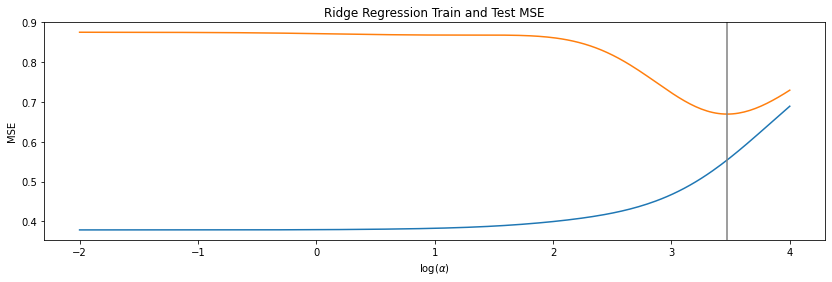

In [18]:
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_train)
ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_test)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.set_title("Ridge Regression Train and Test MSE")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("MSE")
#plt.savefig('ridge_regression_train_test_MSE.png')

In [19]:
ridge_models = []

for alpha in ridge_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.iloc[:,5:].values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.iloc[:,5:].values, y_train.values)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_std, y_train_std)
    ridge_models.append(ridge)

In [20]:
paths = pd.DataFrame(np.empty(shape=(len(ridge_alphas), len(X_train.iloc[:,5:].columns))),
                     index=ridge_alphas, columns=X_train.iloc[:,5:].columns)

for idx, model in enumerate(ridge_models):
    paths.iloc[idx] = model.coef_

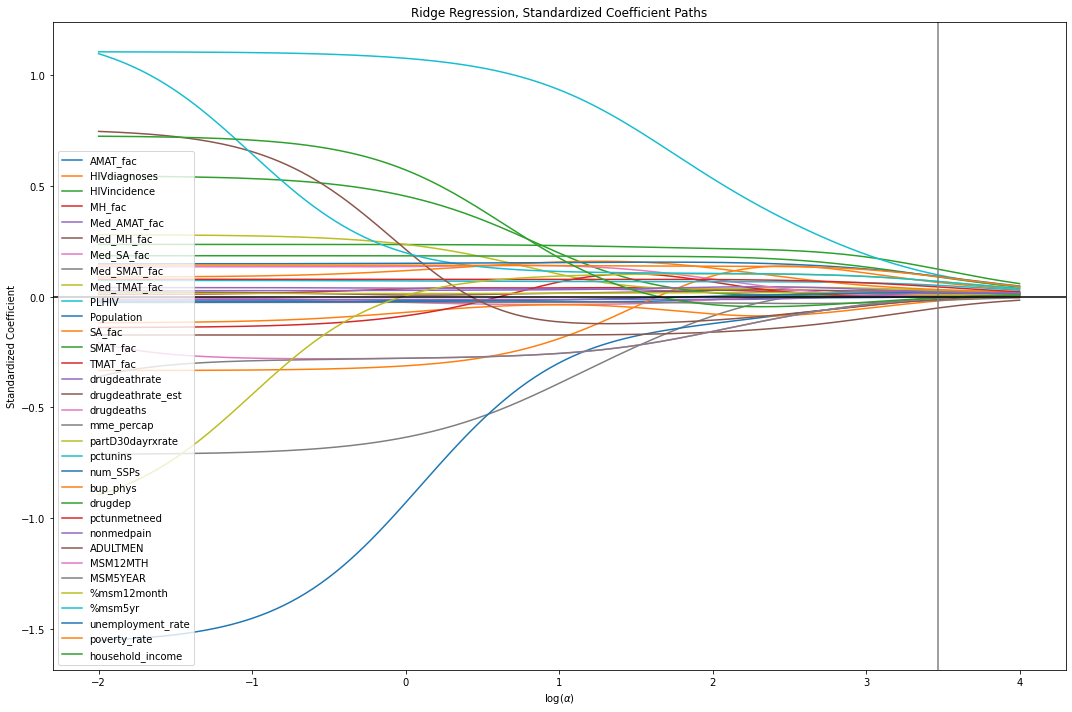

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))

for column in X_train.iloc[:,5:].columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(ridge_alphas), path, label=column)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.axhline(0,color = 'k')
ax.legend(loc='lower left')
ax.set_title("Ridge Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")
plt.tight_layout()
#plt.savefig('images/ridge_regression_standard_coefficient_paths.png')

In [22]:
df_train_coef = pd.DataFrame(paths, columns=X_train.iloc[:,5:].columns, index=np.log10(ridge_alphas))
df_train_coef

,AMAT_fac,HIVdiagnoses,HIVincidence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.975904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.951807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.927711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.903614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.903614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.927711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.951807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.975904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
paths

,AMAT_fac,HIVdiagnoses,HIVincidence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0.010000,-0.019460,-0.333391,0.236330,0.009858,0.041327,0.021574,-0.004568,-0.711026,0.279902,1.105788,-1.551783,-0.117482,0.544805,-0.139077,0.026898,-0.172890,0.134905,-0.026243,0.015049,0.073628,-0.024031,0.089080,0.185296,0.078835,-0.012617,0.746437,-0.206685,-0.361703,-0.894610,1.097313,0.148617,0.143076,0.724724
0.010571,-0.019458,-0.333375,0.236328,0.009894,0.041324,0.021551,-0.004594,-0.710963,0.279867,1.105765,-1.551096,-0.117428,0.544728,-0.139034,0.026900,-0.172893,0.134905,-0.026239,0.015047,0.073625,-0.024028,0.089110,0.185295,0.078833,-0.012617,0.745798,-0.211059,-0.357317,-0.889366,1.092069,0.148620,0.143075,0.724609
0.011174,-0.019455,-0.333358,0.236327,0.009933,0.041321,0.021527,-0.004622,-0.710896,0.279831,1.105741,-1.550371,-0.117371,0.544647,-0.138989,0.026901,-0.172896,0.134906,-0.026234,0.015046,0.073622,-0.024024,0.089142,0.185295,0.078831,-0.012617,0.745122,-0.215193,-0.353169,-0.883884,1.086586,0.148623,0.143073,0.724487
0.011811,-0.019453,-0.333340,0.236326,0.009973,0.041319,0.021501,-0.004651,-0.710826,0.279793,1.105715,-1.549606,-0.117311,0.544562,-0.138942,0.026903,-0.172900,0.134906,-0.026230,0.015044,0.073618,-0.024021,0.089175,0.185294,0.078828,-0.012617,0.744410,-0.219102,-0.349246,-0.878156,1.080858,0.148627,0.143072,0.724358
0.012485,-0.019450,-0.333321,0.236324,0.010015,0.041316,0.021474,-0.004682,-0.710752,0.279752,1.105688,-1.548799,-0.117248,0.544471,-0.138892,0.026905,-0.172903,0.134907,-0.026225,0.015042,0.073615,-0.024017,0.089211,0.185294,0.078826,-0.012617,0.743657,-0.222796,-0.345536,-0.872175,1.074875,0.148630,0.143071,0.724222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8009.666946,0.006786,0.037902,0.069211,0.014817,0.006962,0.017650,0.017775,0.020134,0.020402,0.051356,0.004031,0.000037,0.014065,0.012402,0.011946,-0.020163,0.011710,-0.006492,0.006221,0.033343,0.016234,0.022835,0.050799,0.025754,0.017422,0.003514,0.006615,0.006615,0.042705,0.042728,0.055630,0.053845,0.006697
8466.635113,0.006985,0.036781,0.066605,0.014780,0.007093,0.017469,0.017591,0.019794,0.020003,0.049548,0.004516,0.000696,0.014067,0.012451,0.011637,-0.018998,0.011788,-0.006090,0.006068,0.032285,0.016016,0.022424,0.048983,0.024835,0.017087,0.004022,0.006996,0.006997,0.041366,0.041388,0.053755,0.051967,0.007062
8949.674265,0.007170,0.035691,0.064062,0.014732,0.007213,0.017284,0.017402,0.019456,0.019610,0.047805,0.004968,0.001315,0.014058,0.012489,0.011336,-0.017888,0.011852,-0.005707,0.005916,0.031235,0.015793,0.022018,0.047208,0.023935,0.016733,0.004496,0.007347,0.007348,0.040051,0.040071,0.051910,0.050119,0.007398
9460.271807,0.007339,0.034632,0.061585,0.014675,0.007321,0.017095,0.017207,0.019119,0.019222,0.046125,0.005387,0.001896,0.014036,0.012513,0.011042,-0.016832,0.011903,-0.005344,0.005763,0.030195,0.015563,0.021616,0.045475,0.023054,0.016364,0.004937,0.007669,0.007669,0.038761,0.038779,0.050097,0.048305,0.007708


In [33]:
lasso_alphas = np.logspace(-4, 1, num=250)

lasso_cv_errors_train, lasso_cv_errors_test = train_at_various_alphas(
    X_train.iloc[:,5:].values, y_train.values, Lasso, lasso_alphas, max_iter=10000)

In [39]:
lasso_cv_errors_test.shape

(10, 250)

Text(0, 0.5, 'MSE')

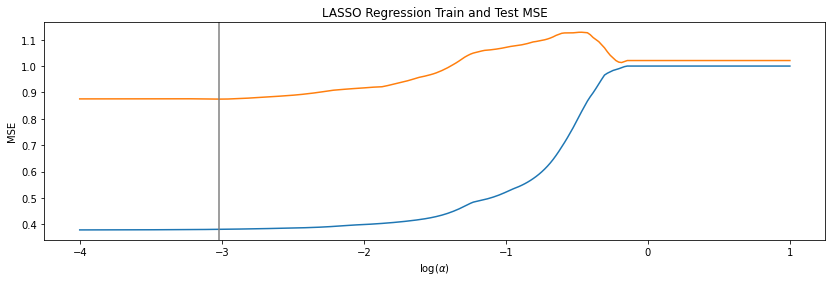

In [40]:
lasso_mean_cv_errors_train = lasso_cv_errors_train.mean(axis=0)
lasso_mean_cv_errors_test = lasso_cv_errors_test.mean(axis=0)

lasso_optimal_alpha = get_optimal_alpha(lasso_mean_cv_errors_test)
    
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_train)
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_test)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.set_title("LASSO Regression Train and Test MSE")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("MSE")

In [41]:
lasso_models = []

for alpha in lasso_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.iloc[:,5:].values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.iloc[:,5:].values, y_train.values)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_std, y_train_std)
    lasso_models.append(lasso)

/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295.9423905400163, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 290.2570636886544, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 284.3415190755479, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might w

/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.619354747731336, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.53794173038909, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.635030948156896, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might

Text(0, 0.5, 'Standardized Coefficient')

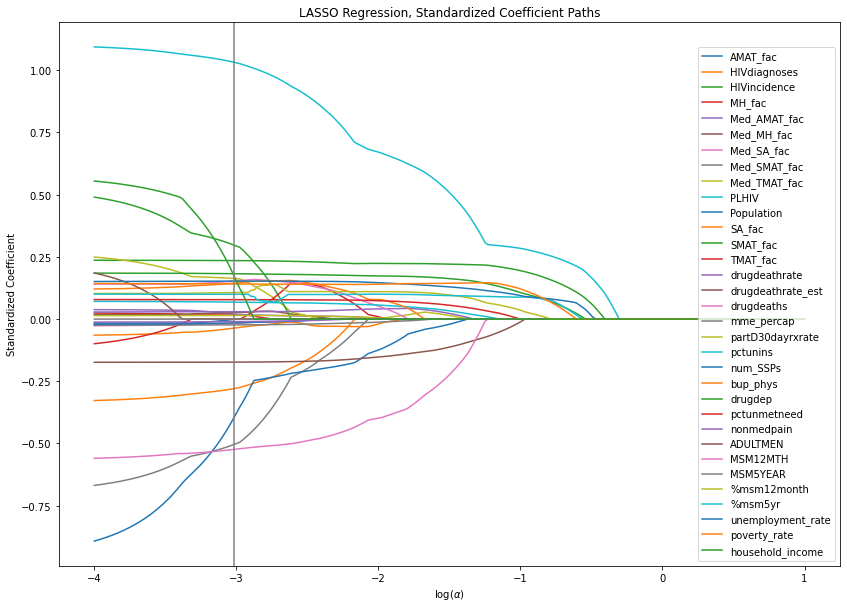

In [42]:
paths = pd.DataFrame(np.empty(shape=(len(lasso_alphas), len(X_train.iloc[:,5:].columns))),
                     index=lasso_alphas, columns=X_train.iloc[:,5:].columns)

for idx, model in enumerate(lasso_models):
    paths.iloc[idx] = model.coef_
    
fig, ax = plt.subplots(figsize=(14, 10))
for column in X_train.iloc[:,5:].columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(lasso_alphas), path, label=column)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.legend(loc='lower right')
ax.set_title("LASSO Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")
plt.savefig('images/LASSO_regression_standardized_coefficient')

In [43]:
lasso_optimal_alpha

0.0009636864286572604